In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from random import randrange
import string
import sys
import time
import math

In [3]:
# Create a transaction 

max_stringLength = 20 # max number of strings per word in a transaction
max_txt_length = 10 # max number of lines of word in a transaction
max_number_of_txns = 50 # max number of transation in a block

# generate random string
def randomString(max_stringLength):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(max_stringLength))

def transaction(max_txt_length):
    """The transaction is a dict of key: value pairs. They are both strings in our case """
    txn = {randomString(randrange(max_stringLength)) : randomString(randrange(max_stringLength)) for i in range(randrange(1, max_txt_length))}
    return txn

def block(max_number_of_txns, exp_time):
    """A block is a list of transaction with the last value being the time it was created """
    blk = {'transactions':[transaction(randrange(2, max_txt_length)) for i in range(randrange(1, max_number_of_txns))], 'time':exp_time}
    return blk

def void_exp_blobk(ledger, exp_time):
    """ The routine scans the ledger and delete expired transactions """
    return [block for block in ledger if block['time'] > exp_time]
    


def get_size (ledger):
    return sys.getsizeof(ledger)


# for ploting
plt.style.use('fivethirtyeight')





# current_txn = transaction(max_txt_length)
# print current_txn


# current_block = block(max_number_of_txns, 1)

# ledger = void_exp_blobk([current_block], 1)

# print current_block
# print ledger
# print (current_txn)
# print (current_block)

# print (get_size(current_block))
# print (get_size([]))


Make a growing ledger and keep ploting it

In [5]:
ledger1 = [] # ledger growing without the delete feature
ledger2 = [] # ledger growing with the delete feature
size_ledger1 = []
size_ledger2 = []


# grow the ledger, 10 blocks per second growing at 5% evey next second
curr_block_number = 10
expiration_period = 5
growth = 0.05
time_horizon = 20


def animate(seconds):
    
# for seconds in range(time_horizon):

    #  add blocks to the ledger   
    curr_block_number *= (1 + growth)
    new_blocks = [block(max_number_of_txns, seconds + 1) for i in range(int(math.floor(curr_block_number)))]
    ledger1.extend(new_blocks)
    ledger2.extend(new_blocks)
    
    # check expired blocks in ledger2
    if seconds > expiration_period:
        ledger2 = void_exp_blobk(ledger2, seconds - expiration_period)
    
    
    # update size
    size_ledger1.append(get_size (ledger1))
    size_ledger2.append(get_size (ledger2))
    
    
    
    #ploting
    plt.cla()
    plt.plot(size_ledger1, label='Uncleared Ledger')
    plt.plot(size_ledger2, label='Cleared ledger')
    plt.legend(loc='upper left')
    plt.tight_layout()
    
    
    
    
    
#     print curr_block_number
#     print size_ledger1[-1]
#     print size_ledger2[-1]
#     print float(size_ledger1[-1])/float(size_ledger2[-1])
    
#     print ledger1
#     print ledger2
    
    #  Compute the ledger size   
    time.sleep(.5) 
    
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000)
    
# plt.tight_layout()
plt.show()
    
    

<Figure size 432x288 with 0 Axes>

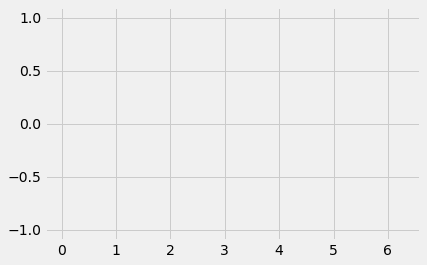